In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from scipy import constants as C



In [4]:
C.c

299792458.0

In [5]:
C.h

6.62606957e-34

In [6]:
import scipy.special as S

In [8]:
S.gamma(1+1j)

(0.49801566811835501-0.15494982830181067j)

In [10]:
import numpy as np
from scipy.optimize import leastsq

In [11]:
X=np.array([8.19,2.72,6.39,8.71,4.7,2.66,3.78])
Y=np.array([7.01,2.78,6.47,6.71,4.1,4.23,4.05])

In [16]:
def residual(p):
    k,b=p
    return Y-(k*X+b)

r=leastsq(residual,[1,0])
k,b=r[0]
print 'k=',k,'b=',b

k= 0.613495349193 b= 1.79409254326


In [45]:
import scipy.optimize as opt
import numpy as np
import sys

points=[]
def f(p):
    x,y=p
    z=(1-x)**2+100*(y-x**2)**2
    points.append((x,y,z))
    return z

def fprime(p):
    x,y=p
    dx=-2+2*x-400*x*(y-x**2)
    dy=200*y-200*x**2
    return np.array([dx,dy])

init_point=(-2,-2)
try:
    method=sys.argv[1]
except:
    method='fmin_bfgs'
    
fmin_func=opt.__dict__[method]
if method in ["fmin","fmin_powell"]:    
    result=fmin_func(f,init_point)
elif method in["fmin_cg","fmin_bfgs","fmin_l_bfgs_b","fmin_tnc"]:
    result=fmin_func(f,init_point,fprime)
elif method in ["fmin_cobyla"]:
    result=fmin_func(f,init_point,[])
else:
    print 'fmin function not found'          
    sys.exit(0)
    
    
import pylab as pl
p=np.array(points)
xmin,xmax=np.min(p[:,0])-1,np.max(p[:,0])+1
ymin,ymax=np.min(p[:,0])-1,np.max(p[:,0])+1
Y,X=np.ogrid[ymin:ymax:500j,xmin:xmax:500j]
Z=np.log10(f((X,Y)))
zmin,zmax=np.min(Z),np.max(Z)
pl.imshow(Z,extent=(xmin,ymin,ymax),origin='botton',aspect='auto')
pl.plot(p[:,0],p[:,1])
pl.scatter(p[:,0],p[:,1],c=range(len(p)))
pl.xlim(xmin,xmax)
pl.ylim(ymin,ymax)
pl.show()

KeyError: '-f'

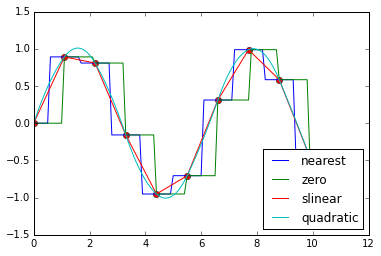

In [29]:
%matplotlib inline
import numpy as np
from scipy import interpolate
import pylab as pl
x=np.linspace(0,11,11)
y=np.sin(x)

xnew=np.linspace(0,10,101)
pl.plot(x,y,'ro')
for kind in ['nearest','zero','slinear','quadratic']:
    f=interpolate.interp1d(x,y,kind=kind)
    ynew=f(xnew)
    pl.plot(xnew,ynew,label=str(kind))
    
pl.legend(loc='lower right')
pl.show()